In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
train_dir = r"C:\Users\To Learn\Desktop\Exp2\bean-leaf-dataset\train\train"
validation_dir = r'C:\Users\To Learn\Desktop\Exp2\bean-leaf-dataset\validation\validation'
test_dir = r"C:\Users\To Learn\Desktop\Exp2\bean-leaf-dataset\test\test"

In [6]:
sample_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=12, class_mode='sparse')

Found 1034 images belonging to 3 classes.


In [7]:
class_names = list(sample_generator.class_indices.keys())

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='sparse')

Found 1034 images belonging to 3 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='sparse', shuffle=False)

Found 133 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/50
32/32 [==============================] - 14s 427ms/step - loss: 0.5807 - accuracy: 0.7425 - val_loss: 0.7242 - val_accuracy: 0.6797
Epoch 2/50
32/32 [==============================] - 14s 435ms/step - loss: 0.5619 - accuracy: 0.7605 - val_loss: 0.4190 - val_accuracy: 0.8125
Epoch 3/50
32/32 [==============================] - 14s 426ms/step - loss: 0.5371 - accuracy: 0.7685 - val_loss: 0.5194 - val_accuracy: 0.7891
Epoch 4/50
32/32 [==============================] - 14s 422ms/step - loss: 0.5078 - accuracy: 0.7864 - val_loss: 0.5046 - val_accuracy: 0.8125
Epoch 5/50
32/32 [==============================] - 14s 439ms/step - loss: 0.4563 - accuracy: 0.8054 - val_loss: 0.4600 - val_accuracy: 0.8281
Epoch 6/50
32/32 [==============================] - 14s 429ms/step - loss: 0.4782 - accuracy: 0.7924 - val_loss: 0.6849 - val_accuracy: 0.6953
Epoch 7/50
32/32 [==============================] - 14s 440ms/step - loss: 0.4586 - accuracy: 0.8114 - val_loss: 0.3667 - val_accuracy: 0.8594

In [16]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')

4/4 [==============================] - 1s 293ms/step - loss: 0.2241 - accuracy: 0.9141
Test accuracy: 0.9140625


In [17]:
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

5/5 [==============================] - 1s 115ms/step


In [18]:
y_true = test_generator.classes

In [19]:
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

angular_leaf_spot       1.00      0.84      0.91        43
        bean_rust       0.82      0.95      0.88        43
          healthy       0.95      0.95      0.95        42

         accuracy                           0.91       128
        macro avg       0.92      0.91      0.92       128
     weighted avg       0.92      0.91      0.91       128



In [20]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

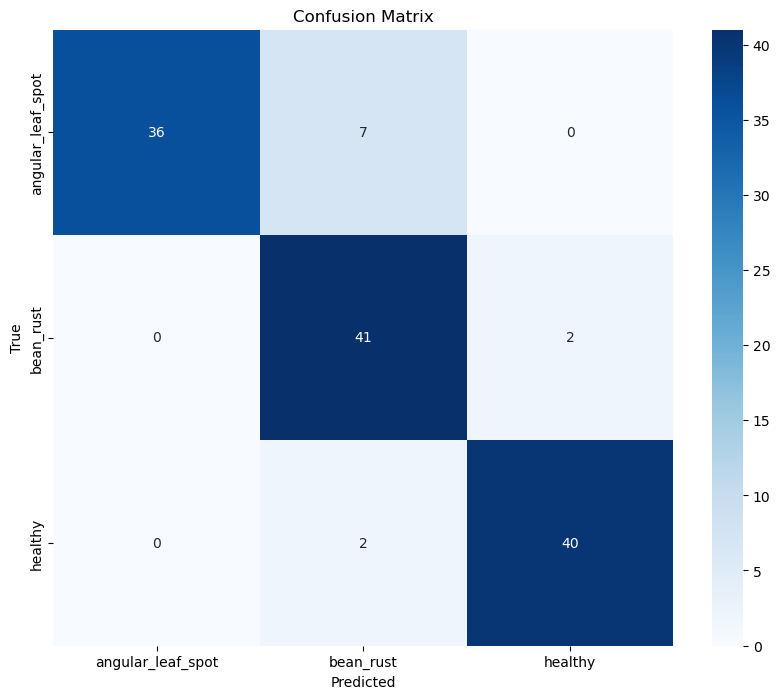

In [21]:
plot_confusion_matrix(y_true, y_pred, class_names)

In [22]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

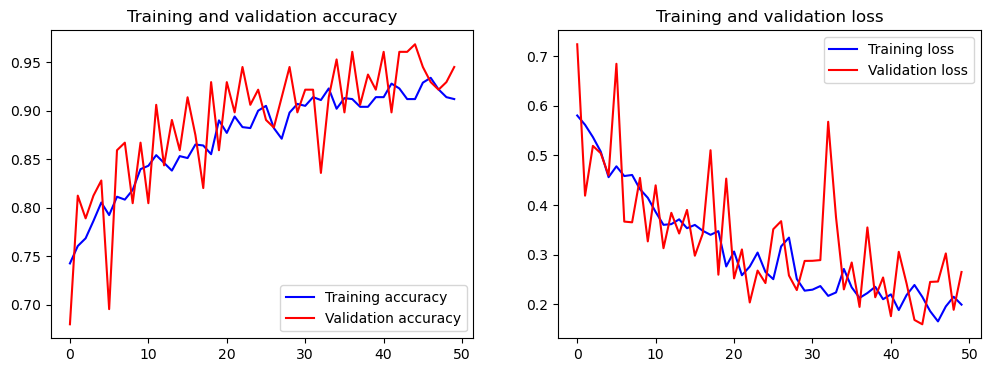

In [23]:
plot_training_history(history)

In [30]:
def plot_predictions(generator, model, class_names):
    x, y_true = next(generator)
    y_pred_prob = model.predict(x)
    y_pred = np.argmax(y_pred_prob, axis=1)

    plt.figure(figsize=(15, 10))
    for i in range(6):
        plt.subplot(3, 4, i + 1)
        plt.imshow(x[i])
        plt.title(f'True: {class_names[int(y_true[i])]}, Pred: {class_names[y_pred[i]]}\nProb: {y_pred_prob[i][y_pred[i]]:.2f}')
        plt.axis('off')
        print()
    plt.show()

1/1 [==============================] - 0s 73ms/step








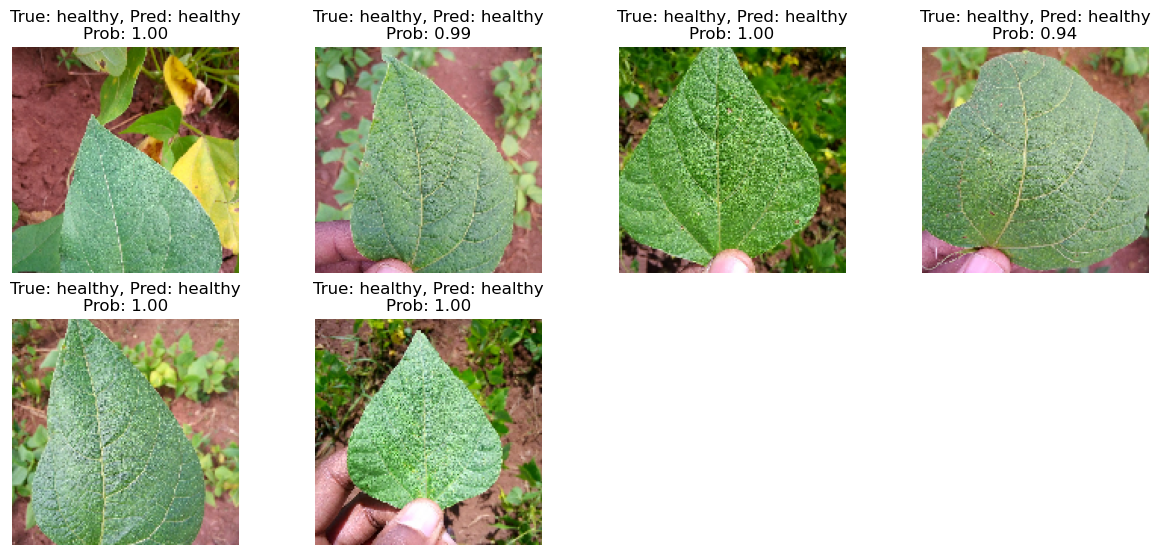

In [31]:
plot_predictions(test_generator, model, class_names)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro') 
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro') 

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9141
Precision: 0.9241
Recall: 0.9144
F1 Score: 0.9152


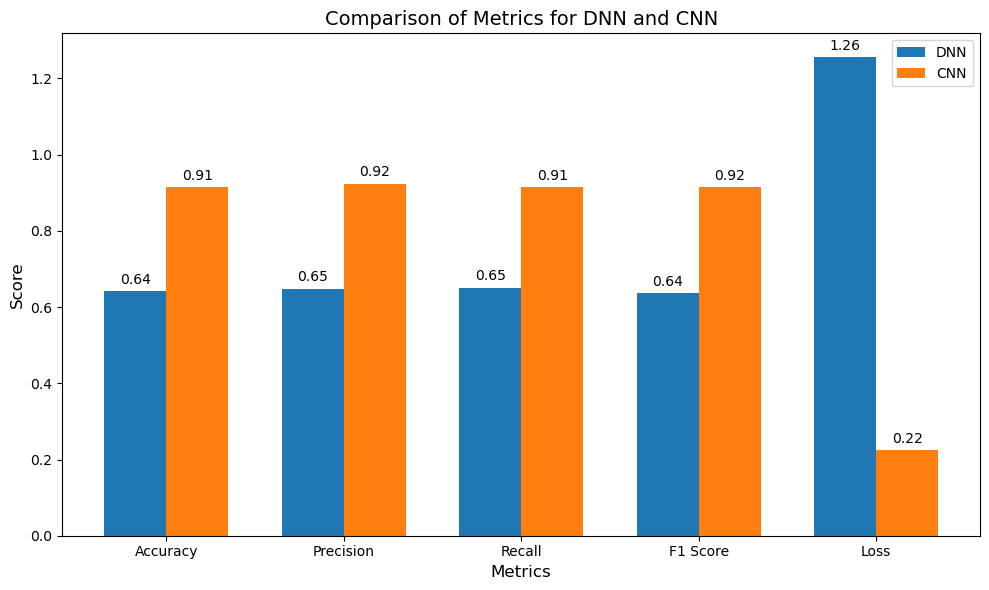

In [37]:
import matplotlib.pyplot as plt
import numpy as np

models = ['DNN', 'CNN']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Loss']
model_a_values = [0.6425, 0.6485, 0.6510, 0.6374, 1.2556]
model_b_values = [0.9141, 0.9241, 0.9144, 0.9152, 0.2241]
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(metrics))

bar1 = ax.bar(index - bar_width/2, model_a_values, bar_width, label='DNN')
bar2 = ax.bar(index + bar_width/2, model_b_values, bar_width, label='CNN')

ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparison of Metrics for DNN and CNN', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(metrics)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()
